In [1]:
#The CIFAR-10 dataset(Canadian Institute For Advanced Research)is a collection of images,contains 60000(32x32)color 
#                                                                                                 images in 10 different classes

# classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# importing the dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
def img_show(index):
    py.figure(figsize= (10,1))
    py.imshow(X_train[index])
    py.xlabel(classes[y_train[index][0]])

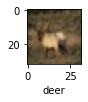

In [10]:
img_show(3)

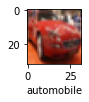

In [11]:
img_show(5)

In [12]:
classes[y_train[3][0]]

'deer'

In [13]:
# preprocessing the data as dividing by 255 bcz RGB values lies between 0 and 255

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [15]:
# doing One Hot Encoding as its showing values in y_train like.. y_train[3] showing 4. 

In [16]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train_categorical = keras.utils.to_categorical(
                y_train, num_classes=10, dtype= 'float32'
)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_categorical = keras.utils.to_categorical(
                y_test, num_classes=10, dtype= 'float32'
)

y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
        optimizer = 'adam', 
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
)

In [20]:
model.fit(X_train_scaled, y_train_categorical, epochs=12)

Epoch 1/12
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9087 - accuracy: 0.3087
Epoch 2/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7246 - accuracy: 0.3814
Epoch 3/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6626 - accuracy: 0.4046
Epoch 4/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6154 - accuracy: 0.4217
Epoch 5/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5812 - accuracy: 0.4332
Epoch 6/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5617 - accuracy: 0.4390
Epoch 7/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5387 - accuracy: 0.4499
Epoch 8/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5201 - accuracy: 0.4556
Epoch 9/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5033 - accuracy: 0.4616
Epoch 10/12
1563/1563 [==============================] - 5s 3ms/step - loss: 1.496

In [21]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 1ms/step - loss: 1.5236 - accuracy: 0.4627


[1.5235590934753418, 0.4627000093460083]

In [22]:
# now model is trained, perform some predictions

In [23]:
import numpy as np

np.argmax(model.predict(X_test_scaled)[5])

6

In [24]:
# predicted res
classes[np.argmax(model.predict(X_test_scaled)[5])]

'frog'

In [25]:
# actual res
classes[y_test[5][0]]

'frog'